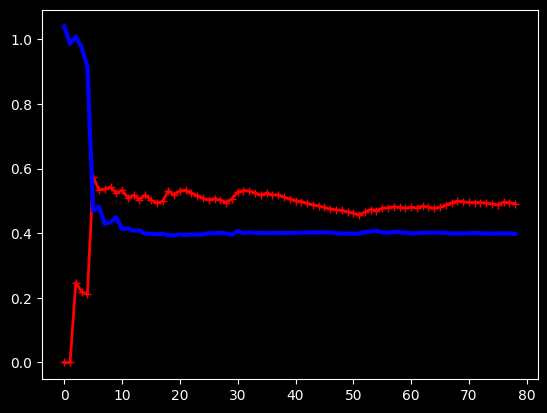

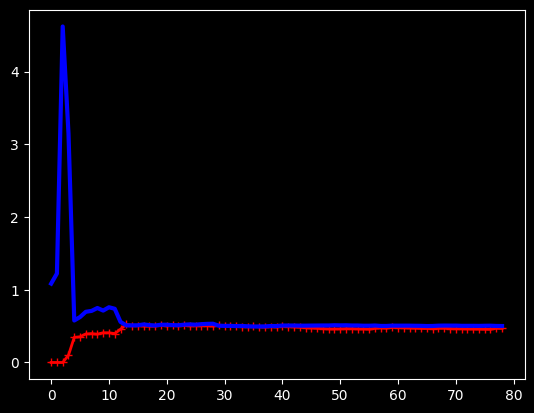

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

m = 100
X = np.linspace(-3, 3, m)
y = np.sin(X) + np.random.uniform(-0.5, 0.5, m)

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='val')
    plt.show()

lin_reg = linear_model.LinearRegression()
plot_learning_curves(lin_reg, np.array(X).reshape(-1, 1), y)

polynomial_regression = Pipeline([
 ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
 ('lin_reg', linear_model.LinearRegression()),
])

plot_learning_curves(polynomial_regression, np.array(X).reshape(-1, 1), y)